In [1]:
using ReverseDiff
using ProgressMeter
using Base.Test
using MLDataPattern
using Plots
pyplot()

Plots.PyPlotBackend()

In [19]:
import Nets
reload("Nets")

INFO: Recompiling stale cache file /Users/rdeits/locomotion/explorations/learning-mpc/packages/lib/v0.6/Nets.ji for module Nets.


0.02989685862586756



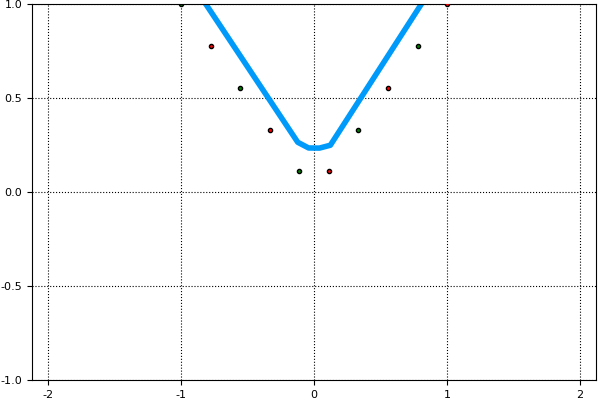

In [52]:
x = linspace(-1, 1, 10)
data = [x >= 0 ? ([x], [x 1]) : ([x], [-x -1]) for x in x]
data = vcat(data[1:2:end], data[2:2:end])
train_data, test_data = splitobs(data, 0.5)

# data = [
# begin
#     x = randn()
#     if x >= 0
#         [x], [x, 1]
#     else
#         [x], [-x, -1]
#     end
#     end for i in 1:20];

widths = [1, 4, 4, 1]
net = Nets.Net(widths)
params = rand(net) .- 0.5
@inferred Nets.predict_sensitivity(net, params, [0])

predict = (params, x) -> Nets.predict_sensitivity(net, params, x)
loss = (params, x, y) -> sum(abs2, y - predict(params, x))

loss(params, data[1][1], data[1][2])

learning_rate = 0.1
@showprogress for i in 1:30
#     Nets.sgd!(loss, params, train_data, 
#         Nets.SGDOpts(learning_rate=0.1, momentum=0., batch_size=2))
    Nets.adam!(loss, params, train_data, 
        Nets.AdamOpts(learning_rate=learning_rate * 0.95^i, batch_size=1))
end

println(mean(xy -> sum(abs2, xy[2][1] - predict(params, xy[1])[1]), test_data))
# @show mean(xy -> loss(params, xy[1], xy[2]), test_data)

xx = linspace(-2, 2)
plt = plot(xx, x -> predict(params, [x])[1], ylim=(-1, 1), legend=nothing, linewidth=4)
plot!(plt, [x[1] for (x, y) in train_data], [y[1] for (x, y) in train_data], 
line=nothing,
markershape=:circle,
markercolor=:green,
markersize=3
)
plot!(plt, [x[1] for (x, y) in test_data], [y[1] for (x, y) in test_data], 
line=nothing,
markershape=:circle,
markercolor=:red,
markersize=3
)
plt

0.1019691404701524



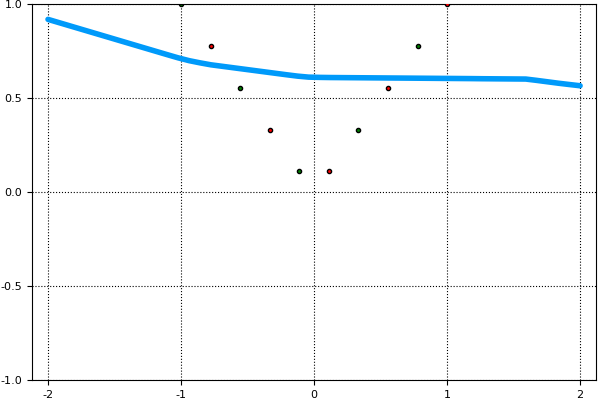

In [53]:
train_data2 = [(d[1], d[2][1:1]) for d in train_data]
test_data2 = [(d[1], d[2][1:1]) for d in test_data]

widths = [1, 4, 4, 1]
net = Nets.Net(widths)
params = rand(net) - 0.5
@inferred Nets.predict(net, params, [0])

predict = (params, x) -> Nets.predict(net, params, x)
loss = (params, x, y) -> sum(abs2, y - predict(params, x))

learning_rate = 0.1
@showprogress for i in 1:30
#     Nets.sgd!(loss, params, train_data2, 
#         Nets.SGDOpts(learning_rate=0.1, momentum=0., batch_size=2))
    Nets.adam!(loss, params, train_data2, 
        Nets.AdamOpts(learning_rate=learning_rate * 0.95^i, batch_size=1))
end

println(mean(xy -> loss(params, xy[1], xy[2]), test_data2))

xx = linspace(-2, 2)
plt = plot(xx, x -> predict(params, [x])[1], ylim=(-1, 1), legend=nothing, linewidth=4)
plot!(plt, [x for (x, y) in train_data2], [y for (x, y) in train_data2], 
line=nothing,
markershape=:circle,
markercolor=:green,
markersize=3
)
plot!(plt, [x for (x, y) in test_data2], [y for (x, y) in test_data2], 
line=nothing,
markershape=:circle,
markercolor=:red,
markersize=3
)
plt